###
survival        目标列，是否存活，1代表存活 (0 = No; 1 = Yes)
pclass          乘坐的舱位级别 (1 = 1st; 2 = 2nd; 3 = 3rd)
name            姓名
sex             性别
age             年龄
sibsp           兄弟姐妹的数量（乘客中）
parch           父母的数量（乘客中）
ticket          票号
fare            票价
cabin           客舱
embarked        登船的港口
                (C = Cherbourg; Q = Queenstown; S = Southampton)

In [65]:
%matplotlib inline

import pandas as pd
#import string
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [66]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if big_string.find(substring) != -1:
            return substring
    return np.nan
def replace_titles(x):
    title=x['Title']
    if title in ['Mr','Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Master']:
        return 'Master'
    elif title in ['Countess', 'Mme','Mrs']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms','Miss']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    elif title =='':
        if x['Sex']=='Male':
            return 'Master'
        else:
            return 'Miss'
    else:
        return title
title_list = ['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                'Don', 'Jonkheer']

In [67]:
label = train['Survived'] # 目标列

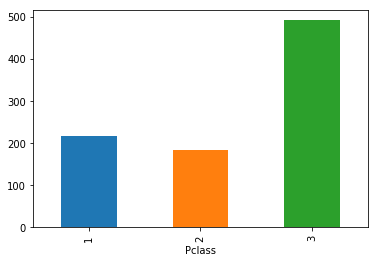

In [68]:
# 接下来我们对每个特征进行一下分析：
x = train.groupby(['Pclass'])
pd.DataFrame(x.mean())
#pd.DataFrame(train)
train.groupby(['Pclass'])['PassengerId'].count().plot(kind='bar')

###没有数据的地方不计数

In [69]:
train.groupby(['Pclass']).count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


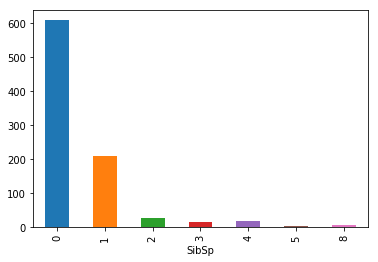

In [70]:
train.groupby(['SibSp'])['PassengerId'].count().plot(kind='bar')

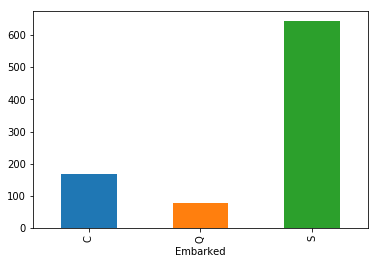

In [71]:
train.groupby(['Embarked'])['PassengerId'].count().plot(kind='bar')

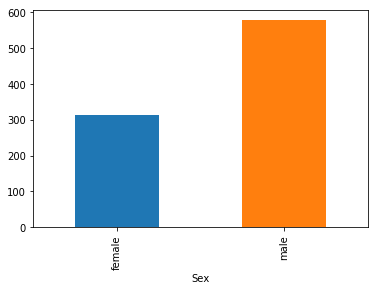

In [72]:
train.groupby(['Sex'])['PassengerId'].count().plot(kind='bar')

In [73]:
print('检测是否有缺失值：')
print(train[train['Age'].isnull()]['Age'].head())

检测是否有缺失值：
5    NaN
17   NaN
19   NaN
26   NaN
28   NaN
Name: Age, dtype: float64


In [74]:
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [75]:
# 处理Title特征
train['Title'] = train['Name'].map(lambda x: substrings_in_string(x, title_list))
test['Title'] = test['Name'].map(lambda x: substrings_in_string(x, title_list))
train['Title'] = train.apply(replace_titles, axis=1)
test['Title'] = test.apply(replace_titles, axis=1)
# family特征
train['Family_Size'] = train['SibSp'] + train['Parch']
train['Family'] = train['SibSp'] * train['Parch']
test['Family_Size'] = test['SibSp'] + test['Parch']
test['Family'] = test['SibSp'] * test['Parch']

In [76]:
train['AgeFill'] = train['Age']
mean_ages = np.zeros(4)
mean_ages[0] = np.average(train[train['Title'] == 'Miss']['Age'].dropna())
mean_ages[1] = np.average(train[train['Title'] == 'Mrs']['Age'].dropna())
mean_ages[2] = np.average(train[train['Title'] == 'Mr']['Age'].dropna())
mean_ages[3] = np.average(train[train['Title'] == 'Master']['Age'].dropna())
train.loc[ (train.Age.isnull()) & (train.Title == 'Miss') ,'AgeFill'] = mean_ages[0]
train.loc[ (train.Age.isnull()) & (train.Title == 'Mrs') ,'AgeFill'] = mean_ages[1]
train.loc[ (train.Age.isnull()) & (train.Title == 'Mr') ,'AgeFill'] = mean_ages[2]
train.loc[ (train.Age.isnull()) & (train.Title == 'Master') ,'AgeFill'] = mean_ages[3]
train['AgeCat'] = train['AgeFill']
train.loc[ (train.AgeFill<=10), 'AgeCat'] = 'child'
train.loc[ (train.AgeFill>60), 'AgeCat'] = 'aged'
train.loc[ (train.AgeFill>10) & (train.AgeFill <=30) ,'AgeCat'] = 'adult'
train.loc[ (train.AgeFill>30) & (train.AgeFill <=60) ,'AgeCat'] = 'senior'
train['Fare_Per_Person'] = train['Fare'] / (train['Family_Size'] + 1)

In [77]:
test['AgeFill'] = test['Age']
mean_ages = np.zeros(4)
mean_ages[0] = np.average(test[test['Title'] == 'Miss']['Age'].dropna())
mean_ages[1] = np.average(test[test['Title'] == 'Mrs']['Age'].dropna())
mean_ages[2] = np.average(test[test['Title'] == 'Mr']['Age'].dropna())
mean_ages[3] = np.average(test[test['Title'] == 'Master']['Age'].dropna())
test.loc[ (test.Age.isnull()) & (test.Title == 'Miss') ,'AgeFill'] = mean_ages[0]
test.loc[ (test.Age.isnull()) & (test.Title == 'Mrs') ,'AgeFill'] = mean_ages[1]
test.loc[ (test.Age.isnull()) & (test.Title == 'Mr') ,'AgeFill'] = mean_ages[2]
test.loc[ (test.Age.isnull()) & (test.Title == 'Master') ,'AgeFill'] = mean_ages[3]
test['AgeCat'] = test['AgeFill']
test.loc[ (test.AgeFill<=10), 'AgeCat'] = 'child'
test.loc[ (test.AgeFill>60), 'AgeCat'] = 'aged'
test.loc[ (test.AgeFill>10) & (test.AgeFill <=30) ,'AgeCat'] = 'adult'
test.loc[ (test.AgeFill>30) & (test.AgeFill <=60) ,'AgeCat'] = 'senior'
test['Fare_Per_Person'] = test['Fare'] / (test['Family_Size'] + 1)

In [78]:
train.Embarked = train.Embarked.fillna('S')
test.Embarked = test.Embarked.fillna('S')
train.loc[ train.Cabin.isnull() == True, 'Cabin'] = 0.2
train.loc[ train.Cabin.isnull() == False, 'Cabin'] = 1
test.loc[ test.Cabin.isnull() == True, 'Cabin'] = 0.2
test.loc[ test.Cabin.isnull() == False, 'Cabin'] = 1

In [79]:
#Age times class
train['AgeClass'] = train['AgeFill'] * train['Pclass']
train['ClassFare'] = train['Pclass'] * train['Fare_Per_Person']
train['HighLow'] = train['Pclass']
train.loc[ (train.Fare_Per_Person < 8) ,'HighLow'] = 'Low'
train.loc[ (train.Fare_Per_Person >= 8) ,'HighLow'] = 'High'
#Age times class
test['AgeClass'] = test['AgeFill'] * test['Pclass']
test['ClassFare'] = test['Pclass'] * test['Fare_Per_Person']
test['HighLow'] = test['Pclass']
test.loc[ (test.Fare_Per_Person < 8) ,'HighLow'] = 'Low'
test.loc[ (test.Fare_Per_Person >= 8) ,'HighLow'] = 'High'

In [80]:
# 处理训练集
Pclass = pd.get_dummies(train.Pclass)
Sex = pd.get_dummies(train.Sex)
Embarked = pd.get_dummies(train.Embarked)
Title = pd.get_dummies(train.Title)
AgeCat = pd.get_dummies(train.AgeCat)
HighLow = pd.get_dummies(train.HighLow)
train_data = pd.concat([Pclass, Sex, Embarked, Title, AgeCat, HighLow], axis=1)
train_data['Age'] = train['Age']
train_data['Fare'] = train['Fare']
train_data['SibSp'] = train['SibSp']
train_data['Parch'] = train['Parch']
train_data['Family_Size'] = train['Family_Size']
train_data['Family'] = train['Family']
train_data['AgeFill'] = train['AgeFill']
train_data['Fare_Per_Person'] = train['Fare_Per_Person']
train_data['Cabin'] = train['Cabin']
train_data['AgeClass'] = train['AgeClass']
train_data['ClassFare'] = train['ClassFare']
cols = ['Age', 'Fare', 'SibSp', 'Parch', 'Family_Size', 'Family', 'AgeFill', 'Fare_Per_Person', 'AgeClass', 'ClassFare']
train_data[cols] = train_data[cols].apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
print(train_data.head())
# 处理测试集
Pclass = pd.get_dummies(test.Pclass)
Sex = pd.get_dummies(test.Sex)
Embarked = pd.get_dummies(test.Embarked)
Title = pd.get_dummies(test.Title)
AgeCat = pd.get_dummies(test.AgeCat)
HighLow = pd.get_dummies(test.HighLow)
test_data = pd.concat([Pclass, Sex, Embarked, Title, AgeCat, HighLow], axis=1)
test_data['Age'] = test['Age']
test_data['Fare'] = test['Fare']
test_data['SibSp'] = test['SibSp']
test_data['Parch'] = test['Parch']
test_data['Family_Size'] = test['Family_Size']
test_data['Family'] = test['Family']
test_data['AgeFill'] = test['AgeFill']
test_data['Fare_Per_Person'] = test['Fare_Per_Person']
test_data['Cabin'] = test['Cabin']
test_data['AgeClass'] = test['AgeClass']
test_data['ClassFare'] = test['ClassFare']
test_data[cols] = test_data[cols].apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
print(test_data.head())

   1  2  3  female  male  C  Q  S  Master  Miss    ...          Fare  \
0  0  0  1       0     1  0  0  1       0     0    ...     -0.048707   
1  1  0  0       1     0  1  0  0       0     0    ...      0.076277   
2  0  0  1       1     0  0  0  1       0     1    ...     -0.047390   
3  1  0  0       1     0  0  0  1       0     0    ...      0.040786   
4  0  0  1       0     1  0  0  1       0     0    ...     -0.047146   

      SibSp     Parch  Family_Size    Family   AgeFill  Fare_Per_Person  \
0  0.059624 -0.063599      0.00954 -0.035494 -0.096747        -0.031799   
1  0.059624 -0.063599      0.00954 -0.035494  0.104309         0.030694   
2 -0.065376 -0.063599     -0.09046 -0.035494 -0.046483        -0.023406   
3  0.059624 -0.063599      0.00954 -0.035494  0.066611         0.012948   
4 -0.065376 -0.063599     -0.09046 -0.035494  0.066611        -0.023162   

   Cabin  AgeClass  ClassFare  
0      1  0.004673  -0.040180  
1      1 -0.121978   0.008161  
2      1  0.058952  

In [83]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.cross_validation import cross_val_score
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [82]:
model_lr = LR(penalty = 'l2', dual = True, random_state = 0)
model_lr.fit(train_data, label)
print ("逻辑回归10折交叉验证得分: ", np.mean(cross_val_score(model_lr, train_data, label, cv=10, scoring='roc_auc')))
result = model_lr.predict( test_data )
output = pd.DataFrame( data={"PassengerId":test["PassengerId"], "Survived":result} )
output.to_csv( "lr.csv", index=False, quoting=3 )

逻辑回归10折交叉验证得分:  0.8718783351724528


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [64]:
model_GNB = GNB()
model_GNB.fit(train_data, label)
print("高斯贝叶斯分类器10折交叉验证得分: ", np.mean(cross_val_score(model_GNB, train_data, label, cv=10, scoring='roc_auc')))
result = model_GNB.predict( test_data )
output = pd.DataFrame( data={"PassengerId":test["PassengerId"], "Survived":result} )
output.to_csv( "gnb.csv", index=False, quoting=3 )

高斯贝叶斯分类器10折交叉验证得分:  0.8571908723085192


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [96]:
train_data.isna().head()

,1,2,3,female,male,C,Q,S,Master,Miss,...,Fare,SibSp,Parch,Family_Size,Family,AgeFill,Fare_Per_Person,Cabin,AgeClass,ClassFare
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [95]:
train_data.groupby(['male']).count()

,1,2,3,female,C,Q,S,Master,Miss,Mr,...,Fare,SibSp,Parch,Family_Size,Family,AgeFill,Fare_Per_Person,Cabin,AgeClass,ClassFare
male,,,,,,,,,,,,,,,,,,,,,
0,314,314,314,314,314,314,314,314,314,314,...,314,314,314,314,314,314,314,314,314,314
1,577,577,577,577,577,577,577,577,577,577,...,577,577,577,577,577,577,577,577,577,577


In [97]:
train_data.dropna(inplace=True)